In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import pearsonr

## Mutual Information Example

We use the data provided in the file mutual_information.csv which is in the ./Data directory of the GitHub repository. First we'll read in the data.

In [2]:
# Read in the data
df_mutual = pd.read_csv('./Data/mutual_information_data.csv')

Now let's take a quick look at the data

In [3]:
# Look at the data
df_mutual.head()

,x,y,z
0,-0.978500,-1.334434,-19.009967
1,2.013341,2.023878,66.319742
2,1.716996,0.449100,0.724634
3,-4.779289,-3.964138,-498.352258
4,-4.388562,-4.707113,-834.360689


We can see the data has three columns, x, y and z. Let's plot each of y and z against x. First will do a scatter plot of y against x.

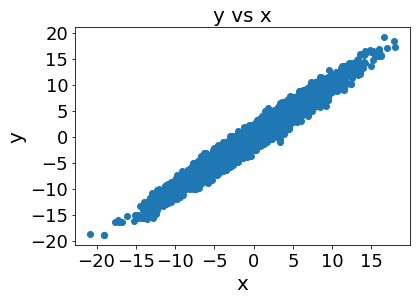

In [4]:
# Scatter plot of y against x
plt.scatter(df_mutual['x'], df_mutual['y'])
plt.title('y vs x', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

We can see there is a strong linear relationship between y and x. Next we'll do a scatter plot of z against x

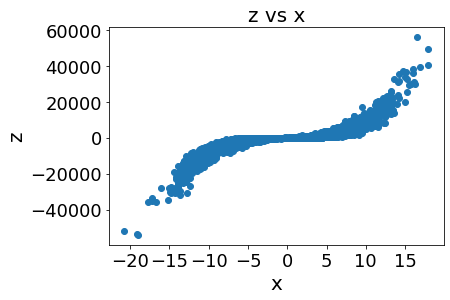

In [5]:
# Scatter plot of z against x
plt.scatter(df_mutual['x'], df_mutual['z'])
plt.title('z vs x', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('z', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

We can see there is still a strong relationship between z and x, but it is non-linear so if we were to measure the Pearson correlation between z and x it would not be as high as the relationship between y and x. 

We'll calculate those Pearson correlation coefficients. We'll use the scipy.stats.pearsonr function to calculate the Pearson correlations for us.

In [6]:
print("Pearson correlation between y and x = ", pearsonr(df_mutual['x'], df_mutual['y'])[0])
print("Pearson correlation between z and x = ", pearsonr(df_mutual['x'], df_mutual['z'])[0])

Pearson correlation between y and x =  0.9801371625555979
Pearson correlation between z and x =  0.7569629714461419


There is a 26% difference between the two Pearson correlation coefficient values. The z values in the dataset have actually been constructed from the y values using the non-linear relationship $z=8y^{3}$.

Using the Pearson correlation coefficient to identify relationships between variables, from samples of those variables, works well when the relationship is clearly linear. However, when the relationship betweem two variables is non-linear, the Pearson correlation coefficient is not so good at identifying that a relationship is present.

Now for comparison we'll estimate the mutual information between y and x and between z and x. We'll use the sklearn.feature_selection.mutual_info_regression function to estimate the mutual information for us.

In [7]:
print("Mutual information between y and x = ", mutual_info_regression(df_mutual['x'].values.reshape(-1,1), df_mutual['y'])[0])
print("Mutual information between z and x = ", mutual_info_regression(df_mutual['x'].values.reshape(-1,1), df_mutual['z'])[0])

Mutual information between y and x =  1.6219665917644344
Mutual information between z and x =  1.6154811463758527


There is a 0.4% difference between those two estimates of mutual information. This says the mutual information is just as good at identifying a relationship between two variables when that relationship is non-linear as when the relationship is linear. 

The numerical difference between the mutual information values will be due to the fact we are estimating the mutual information values from samples of the random variables, not the underlying true distributions of the random variables. 